In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
#importing the dataset

data = pd.read_csv("data.csv")
print(data.head())

   MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  SA  \
0   16   16   16      8      8      8      8    2    1    1     0     0   0   
1   16   16   16      8      8      8      8    2    1    1     0     0   0   
2   16   16   16      8      8      8      8    2    1    1     0     0   1   
3   16   16   16      8      8      8      8    2    1    1     0     0   1   
4   16   16   16      8      8      8      8    2    1    1     0     1   0   

   SB  Run1 (ms)  Run2 (ms)  Run3 (ms)  Run4 (ms)  
0   0     115.26     115.87     118.55     115.80  
1   1      78.13      78.25      79.25      79.19  
2   0      79.84      80.69      80.76      80.97  
3   1      84.32      89.90      86.75      85.58  
4   0     115.13     121.98     122.73     114.81  


In [4]:
data["Avg_Run"] = data.iloc[:,14:].mean(axis = 1)
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Avg_Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


In [5]:
median_class = data['Avg_Run'].median()
data.loc[data['Avg_Run'] >= median_class, 'Run_Class'] = 1
data.loc[data['Avg_Run'] < median_class, 'Run_Class'] = 0

In [6]:
data.drop(['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)', 'Avg_Run'], axis = 1, inplace = True)
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run_Class
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1.0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1.0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1.0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1.0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1.0


In [7]:
# defining feature matrix(X) and response vector(y) 
X = data.iloc[:, 0:14]
y = data["Run_Class"]


# splitting X and y into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, 
                                                    random_state=10) 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [8]:
X_train.shape

(120800, 14)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
error = []

# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

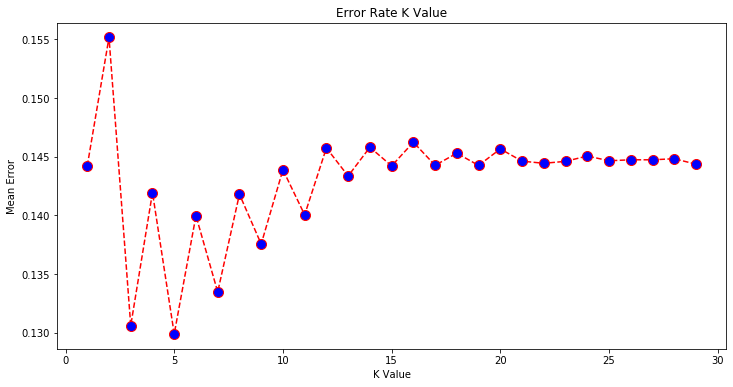

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [13]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

#The first step is to import the KNeighborsClassifier class from the 
#sklearn.neighbors library. In the second line, this class is initialized with one parameter,
#i.e. n_neigbours. This is basically the value for the K. There is no ideal value for K and 
#it is selected after testing and evaluation, however to start out, 
#5 seems to be the most commonly used value for KNN algorithm.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
y_pred_train = classifier.predict(X_train)

In [16]:
from sklearn.metrics import accuracy_score
print("Accuracy for KNN for train :",accuracy_score(y_train,y_pred_train)*100)
print("Accuracy for KNN for test :",accuracy_score(y_test,y_pred)*100)

Accuracy for KNN for train : 92.51158940397352
Accuracy for KNN for test : 87.01158940397352


In [17]:
# performing the same on the heart dataset
#importing the dataset

data = pd.read_csv("heart.csv")
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [18]:
# defining feature matrix(X) and response vector(y) 
X = data.iloc[:, 0:13]
y = data["target"]

# splitting X and y into training and testing sets 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=10) 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [19]:
X_train.shape

(212, 13)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
error = []

# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

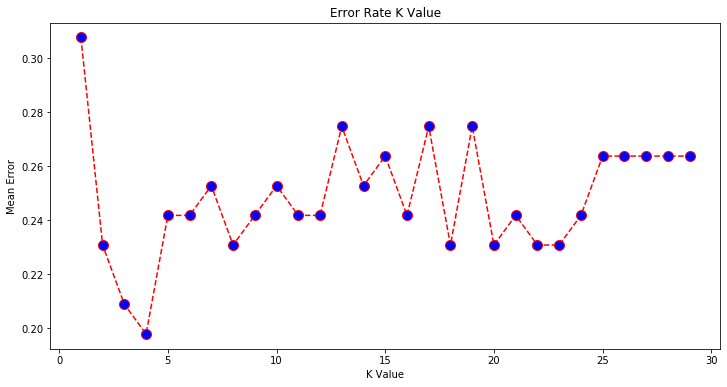

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [38]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [39]:
y_pred_train = classifier.predict(X_train)

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
print("Accuracy for KNN for train :",accuracy_score(y_train,y_pred_train)*100)
print("Accuracy for KNN for test :",accuracy_score(y_test,y_pred)*100)

Accuracy for KNN for train : 86.32075471698113
Accuracy for KNN for test : 80.21978021978022
